In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
file = r'..\data\usdc-weth.csv'
df_temp = pd.read_csv(file, parse_dates=['BLOCK_TIMESTAMP'])
display(df_temp.columns)
display(df_temp.shape)
df_temp.tail()

Index(['BLOCKCHAIN', 'BLOCK_ID', 'BLOCK_TIMESTAMP', 'TX_ID', 'ACTION',
       'AMOUNT0_ADJUSTED', 'AMOUNT1_ADJUSTED', 'AMOUNT0_USD', 'AMOUNT1_USD',
       'TOKEN0_ADDRESS', 'TOKEN1_ADDRESS', 'TOKEN0_SYMBOL', 'TOKEN1_SYMBOL',
       'TOKEN0_PRICE', 'TOKEN1_PRICE', 'LIQUIDITY', 'LIQUIDITY_ADJUSTED',
       'LIQUIDITY_PROVIDER', 'NF_POSITION_MANAGER_ADDRESS', 'NF_TOKEN_ID',
       'POOL_ADDRESS', 'POOL_NAME', 'TICK_LOWER', 'TICK_UPPER',
       'PRICE_LOWER_1_0', 'PRICE_UPPER_1_0', 'PRICE_LOWER_0_1',
       'PRICE_UPPER_0_1', 'PRICE_LOWER_1_0_USD', 'PRICE_UPPER_1_0_USD',
       'PRICE_LOWER_0_1_USD', 'PRICE_UPPER_0_1_USD'],
      dtype='object')

(71769, 32)

,BLOCKCHAIN,BLOCK_ID,BLOCK_TIMESTAMP,TX_ID,ACTION,AMOUNT0_ADJUSTED,AMOUNT1_ADJUSTED,AMOUNT0_USD,AMOUNT1_USD,TOKEN0_ADDRESS,...,TICK_LOWER,TICK_UPPER,PRICE_LOWER_1_0,PRICE_UPPER_1_0,PRICE_LOWER_0_1,PRICE_UPPER_0_1,PRICE_LOWER_1_0_USD,PRICE_UPPER_1_0_USD,PRICE_LOWER_0_1_USD,PRICE_UPPER_0_1_USD
71764,ethereum,13519848,2021-10-30 17:38:46,0x932c4575266b88c4eb7ee75c1a4e645a64e1ad4f629b...,INCREASE_LIQUIDITY,0.000000,5.00000,0.000000,21760.440298,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,...,190200,192180,0.000182,0.000222,4509.682144,5497.078523,0.791709,0.965054,4510.105327,5497.594362
71765,ethereum,13519879,2021-10-30 17:45:12,0x3ebdf5f1b7fbd73bac0e98f469d02e7ecba6ef0a1018...,INCREASE_LIQUIDITY,0.000000,100.00000,0.000000,435208.805955,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,...,191040,192600,0.000198,0.000231,4324.207008,5054.207038,0.861082,1.006448,4324.612786,5054.681318
71766,ethereum,13519931,2021-10-30 17:56:18,0x9b1c1bef36434bfcf1c76b31cdc2dec7bd9f896b32f4...,DECREASE_LIQUIDITY,134883.061699,0.00000,134895.718958,0.000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,...,193320,193500,0.000249,0.000253,3952.045419,4023.822705,1.081580,1.101224,3952.416274,4024.200296
71767,ethereum,12698109,2021-06-24 17:18:14,0xc5954b7e314b46dcaa88f2d8b4937c3324826153547f...,INCREASE_LIQUIDITY,236941.002300,0.00000,237108.785314,0.000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,...,200220,200400,0.000495,0.000504,1982.319790,2018.322801,0.973101,0.990775,1983.723514,2019.752019
71768,ethereum,12698119,2021-06-24 17:20:10,0xeb31c7901fbc719f7a3f0057cb054a37163b03815ff2...,DECREASE_LIQUIDITY,0.000000,49.34706,0.000000,96919.241611,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,...,195600,199320,0.000312,0.000453,2208.386968,3203.499390,0.613090,0.889352,2209.950775,3205.767857


In [3]:
col = ['BLOCK_TIMESTAMP', 'TX_ID', 'ACTION', 'LIQUIDITY_PROVIDER', 'LIQUIDITY_ADJUSTED']
df = df_temp.copy()[col].sort_values(by=['BLOCK_TIMESTAMP']).reset_index(drop=True)
df.tail()

,BLOCK_TIMESTAMP,TX_ID,ACTION,LIQUIDITY_PROVIDER,LIQUIDITY_ADJUSTED
71764,2022-03-03 12:12:57,0xa1683be68cd2cc160be7b7738b7dddf953c8c2e46842...,DECREASE_LIQUIDITY,0x5866de596a796ac7e97eff6d143b5ea4b0431645,NaN
71765,2022-03-03 12:19:50,0xa824b96d7590acd9a7ba0e8f92e2bf966ab360cc368f...,INCREASE_LIQUIDITY,0x5866de596a796ac7e97eff6d143b5ea4b0431645,37.879822
71766,2022-03-03 12:20:31,0x11383e9770ef824bcc9d9ee04958cea40d0dd89a5253...,INCREASE_LIQUIDITY,0xf625dc2d8ddaf08f0f27593a3a32feb1f137e5da,3327.647736
71767,2022-03-03 13:01:40,0x20cd3a2b9ab2f63781e80ad7dfab981a1cb67c13ee66...,DECREASE_LIQUIDITY,0xb1be56f2c3f8f18232e7e4605f6d5f1ef8659ce9,4457.735151
71768,2022-03-03 13:04:12,0x10ee54f26372520fd957c4ea9de41ea2ec3c8be87a48...,INCREASE_LIQUIDITY,0xb1be56f2c3f8f18232e7e4605f6d5f1ef8659ce9,4458.078341


In [4]:
df_temp = df.copy()
df_temp = df_temp[pd.notnull(df_temp['LIQUIDITY_ADJUSTED'])]
incr_liq = df_temp[df_temp['ACTION'] == 'INCREASE_LIQUIDITY']
decr_liq = df_temp[df_temp['ACTION'] == 'DECREASE_LIQUIDITY']
bad_txns = pd.merge(incr_liq, decr_liq,  how='inner', left_on=['BLOCK_TIMESTAMP', 'LIQUIDITY_PROVIDER'], right_on =['BLOCK_TIMESTAMP', 'LIQUIDITY_PROVIDER'])['TX_ID_x']
df = df[~df['TX_ID'].isin(bad_txns)]

In [5]:
pd.set_option('display.max_colwidth', None)
df_pivot = pd.pivot_table(df, values='LIQUIDITY_ADJUSTED', index=['LIQUIDITY_PROVIDER'], columns=['ACTION'], aggfunc=np.sum)
df_pivot

ACTION,DECREASE_LIQUIDITY,INCREASE_LIQUIDITY
LIQUIDITY_PROVIDER,,
0x000000000088e0120f9e6652cc058aec07564f69,NaN,0.424268
0x000003987ea68fc0e08053268aea422cdb900000,45086.044494,45086.044494
0x0000e38f37dffb8577270160b11211b681dd6774,145.626702,145.626702
0x00062acefae5c760cc18cac5a98d84e0ced0cfd1,NaN,2.508194
0x00068fe89b1e236724d7eac5d06cf3f2fb8d01e7,NaN,15.469068
...,...,...
0xffe19ca947f59e2df4893ecbd6cb6434355210c2,366.887842,366.887842
0xffe296bbbc86dfac056b42c6180d9f8b4cb412aa,NaN,415.120441
0xffe505d1753602e36cf91e97cf71ac2a328f2ae6,17.730846,17.730846


In [6]:
display(df_pivot.sum())

ACTION
DECREASE_LIQUIDITY    1.365148e+11
INCREASE_LIQUIDITY    1.998054e+13
dtype: float64

In [7]:
matching_df = df_pivot[df_pivot['INCREASE_LIQUIDITY'] == df_pivot['DECREASE_LIQUIDITY']]
display(matching_df.sum())

ACTION
DECREASE_LIQUIDITY    4.558141e+09
INCREASE_LIQUIDITY    4.558141e+09
dtype: float64

#### Notes:

We have most of the liquidity accounted for (i.e. we are close to the DECREASE_LIQUIDITY number). INCREASE_LIQUIDITY is higher, most likely due to current providers still in the pool

In [8]:
liq_df = df[df['LIQUIDITY_PROVIDER'].isin(matching_df.index)]
df.shape, liq_df.shape

((70821, 5), (24971, 5))

In [9]:
liq_df.groupby('LIQUIDITY_PROVIDER').TX_ID.count()

LIQUIDITY_PROVIDER
0x000003987ea68fc0e08053268aea422cdb900000     2
0x0000e38f37dffb8577270160b11211b681dd6774     2
0x000ef2b60d565ac16d06ff791129055e591b631e     2
0x00336cd9f823dd8b5c5741638e5038fd561f01b9     8
0x003b810c511360f169fc55d5c8e6e8f4f4410caf    11
                                              ..
0xffcf320bd4c87beb7d44cbc51e98ae67aa28a6f2     7
0xffdb8f98cfac992824dfac77c88d2107c6df3ab5     2
0xffe19ca947f59e2df4893ecbd6cb6434355210c2     3
0xffe505d1753602e36cf91e97cf71ac2a328f2ae6     3
0xffefdcfff613c9bbb9928f6ff44f07c7b562bfdf     4
Name: TX_ID, Length: 4602, dtype: int64

### Testing the Algorithm

Use a single txn to test

In [10]:
df_temp = liq_df[liq_df['LIQUIDITY_PROVIDER'] == '0x003b810c511360f169fc55d5c8e6e8f4f4410caf']
df_temp = df_temp[pd.notnull(df_temp['LIQUIDITY_ADJUSTED'])]
df_temp

,BLOCK_TIMESTAMP,TX_ID,ACTION,LIQUIDITY_PROVIDER,LIQUIDITY_ADJUSTED
6377,2021-05-28 03:52:22,0x2d912191b0bcca6692b069834e1015beab8bd39d8796354977c15fd30cfb1572,INCREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1209.216137
7083,2021-05-29 02:34:37,0x0a15f8e71b8d62415c41f033aa1220c4bfc0707081b0826d5ef6daf0a53fe702,INCREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,469.255298
10211,2021-06-02 04:42:55,0x2021c3fa79f623d24fc72844775c5ca695ac1725358ed7756b5f2981aaae8d57,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1209.216137
12880,2021-06-06 02:39:36,0x35d4635c3dab54d133fc7411b7fd648777c057f541eb22594bd6f6e835eed248,INCREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1018.708286
13379,2021-06-06 21:27:36,0x0d25f6855713cc812cc84bba459f7a823048ab7e9310dd7aca195a5fa5dedda5,INCREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,2076.197191
31373,2021-07-02 20:38:21,0x4877ad6417b8039a7a0f3f97aea68fcacf0f29cf2d82e27eb5ba7e63fa56c2be,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1018.708286
31375,2021-07-02 20:38:55,0xd07792001271e5f2eb4d4026f1ceca26615241e3a002dff0f6c0b3cfe52cafe5,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,2076.197191
32625,2021-07-04 16:48:12,0x7bd05c8eea7f47e2b9115297cebb187688972bd87c501b82376de3b5b673682f,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,469.255298


In [11]:
incr_liq = df_temp[df_temp['ACTION'] == 'INCREASE_LIQUIDITY']
incr_liq = incr_liq.sort_values(by='BLOCK_TIMESTAMP')
total_liq = incr_liq.LIQUIDITY_ADJUSTED.sum()
objs = [{'timestamp': row['BLOCK_TIMESTAMP'], 'total': row['LIQUIDITY_ADJUSTED'], 'remaining': row['LIQUIDITY_ADJUSTED'], 'deltas': [], 'weights': []} for idx, row in incr_liq.iterrows()]
objs    

[{'timestamp': Timestamp('2021-05-28 03:52:22'),
  'total': 1209.216136607,
  'remaining': 1209.216136607,
  'deltas': [],
  'weights': []},
 {'timestamp': Timestamp('2021-05-29 02:34:37'),
  'total': 469.255297883,
  'remaining': 469.255297883,
  'deltas': [],
  'weights': []},
 {'timestamp': Timestamp('2021-06-06 02:39:36'),
  'total': 1018.708286054,
  'remaining': 1018.708286054,
  'deltas': [],
  'weights': []},
 {'timestamp': Timestamp('2021-06-06 21:27:36'),
  'total': 2076.197190977,
  'remaining': 2076.197190977,
  'deltas': [],
  'weights': []}]

In [12]:
decr_liq = df_temp[df_temp['ACTION'] == 'DECREASE_LIQUIDITY'].sort_values(by='BLOCK_TIMESTAMP')
decr_liq

,BLOCK_TIMESTAMP,TX_ID,ACTION,LIQUIDITY_PROVIDER,LIQUIDITY_ADJUSTED
10211,2021-06-02 04:42:55,0x2021c3fa79f623d24fc72844775c5ca695ac1725358ed7756b5f2981aaae8d57,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1209.216137
31373,2021-07-02 20:38:21,0x4877ad6417b8039a7a0f3f97aea68fcacf0f29cf2d82e27eb5ba7e63fa56c2be,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1018.708286
31375,2021-07-02 20:38:55,0xd07792001271e5f2eb4d4026f1ceca26615241e3a002dff0f6c0b3cfe52cafe5,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,2076.197191
32625,2021-07-04 16:48:12,0x7bd05c8eea7f47e2b9115297cebb187688972bd87c501b82376de3b5b673682f,DECREASE_LIQUIDITY,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,469.255298


In [13]:
i = 0

for ind, row in decr_liq.iterrows():
    liq = row['LIQUIDITY_ADJUSTED']
    time = row['BLOCK_TIMESTAMP']
    
    if pd.isnull(liq): continue
        
    while True:                  
        if pd.isnull(objs[i]['remaining']) or objs[i]['remaining'] <= 0: i += 1         
        incr_time = objs[i]['timestamp']        
        delta = (time - incr_time).total_seconds()                
        # decrease cases
        # 1. the decrease liquidity is complete absorbed by the increase liquidity
        if round(objs[i]['remaining'], 6) > round(liq, 6):            
            objs[i]['remaining'] = objs[i]['remaining'] - liq
            objs[i]['deltas'].append(delta)
            objs[i]['weights'].append(liq)
            break
        elif round(objs[i]['remaining'], 6) == round(liq, 6):
            objs[i]['remaining'] = objs[i]['remaining'] - liq
            objs[i]['deltas'].append(delta)
            objs[i]['weights'].append(liq)
            i += 1
            break
        else:
            objs[i]['deltas'].append(delta)
            objs[i]['weights'].append(objs[i]['remaining'])
            liq = liq - objs[i]['remaining']
            objs[i]['remaining'] = 0
            i += 1

objs

[{'timestamp': Timestamp('2021-05-28 03:52:22'),
  'total': 1209.216136607,
  'remaining': 0.0,
  'deltas': [435033.0],
  'weights': [1209.216136607]},
 {'timestamp': Timestamp('2021-05-29 02:34:37'),
  'total': 469.255297883,
  'remaining': 0,
  'deltas': [3002624.0],
  'weights': [469.255297883]},
 {'timestamp': Timestamp('2021-06-06 02:39:36'),
  'total': 1018.708286054,
  'remaining': 0,
  'deltas': [2311125.0, 2311159.0],
  'weights': [549.452988171, 469.255297883]},
 {'timestamp': Timestamp('2021-06-06 21:27:36'),
  'total': 2076.197190977,
  'remaining': -1.1368683772161603e-13,
  'deltas': [2243479.0, 2402436.0],
  'weights': [1606.941893094, 469.255297883]}]

In [14]:
position_holding = [{'total': k['total'], 'wht': np.average(k['deltas'], weights=k['weights'])} for k in objs]                     
position_holding

[{'total': 1209.216136607, 'wht': 435033.0},
 {'total': 469.255297883, 'wht': 3002624.0},
 {'total': 1018.708286054, 'wht': 2311140.6616769945},
 {'total': 2076.197190977, 'wht': 2279405.941193138}]

In [15]:
wghts = [k['total'] for k in position_holding]
ht = [k['wht'] for k in position_holding]
wghts, ht

([1209.216136607, 469.255297883, 1018.708286054, 2076.197190977],
 [435033.0, 3002624.0, 2311140.6616769945, 2279405.941193138])

In [16]:
np.average(ht, weights=wghts)

1890049.888124294

### Weighted Avg Holding Period 

Code isn't the most efficient, but *should* work.

We need to weigh it 3 times.

1. For each LP, each of their INCREASE_LIQUIDITY has a weighted amount of time until that liquidity is removed (i.e for one INCREASE, find DECREASES until this increase is withdrawn)
2. Now, for each of these weighted amount of time for each INCREASE_LIQUIDITY, we need to weight (we have a series of INCREASES + time until withdraw; Sum(Increase Liquidity Size * weighted time till withdrawn) / Sum(Increase Liquidity Size)

3. Now, we have the average holding time per LP. We need a weighted average across these LPs

In [17]:
def position_weighted_holding_period(df_window):
    incr_liq = df_window[df_window['ACTION'] == 'INCREASE_LIQUIDITY'].sort_values(by='BLOCK_TIMESTAMP')
    total_liq = incr_liq.LIQUIDITY_ADJUSTED.sum()
    objs = [{'timestamp': row['BLOCK_TIMESTAMP'], 'total': row['LIQUIDITY_ADJUSTED'], 'remaining': row['LIQUIDITY_ADJUSTED'], 'deltas': [], 'weights': []} for idx, row in incr_liq.iterrows()]
    decr_liq = df_window[df_window['ACTION'] == 'DECREASE_LIQUIDITY'].sort_values(by='BLOCK_TIMESTAMP')
    
    i, j = 0, 0

    for ind, row in decr_liq.iterrows():
        liq = row['LIQUIDITY_ADJUSTED']
        time = row['BLOCK_TIMESTAMP']

        if pd.isnull(liq): continue

        while True:   
            if i >= len(objs): 
                print(df_window)
                raise Exception("Error")
            if pd.isnull(objs[i]['remaining']) or objs[i]['remaining'] <= 0: i += 1

            incr_time = objs[i]['timestamp']
            delta = (time - incr_time).total_seconds()

            # decrease cases
            # 1. the decrease liquidity is complete absorbed by the increase liquidity
            if round(objs[i]['remaining'], 6) > round(liq, 6):
                objs[i]['remaining'] = objs[i]['remaining'] - liq
                objs[i]['deltas'].append(delta)
                objs[i]['weights'].append(liq)
                j += 1
                break
            elif round(objs[i]['remaining'], 6) == round(liq, 6):
                objs[i]['remaining'] = objs[i]['remaining'] - liq
                objs[i]['deltas'].append(delta)
                objs[i]['weights'].append(liq)
                i += 1
                j += 1
                break
            else:
                objs[i]['deltas'].append(delta)
                objs[i]['weights'].append(objs[i]['remaining'])
                liq = liq - objs[i]['remaining']
                objs[i]['remaining'] = 0
                i += 1
    remaining = sum([round(k['remaining'], 2) for k in objs])
    if remaining != 0 or j != decr_liq.shape[0]: 
        print(df_window)
        print(objs)
        raise Exception('The fuck')
    position_holding = [{'total': k['total'], 'wht': np.average(k['deltas'], weights=k['weights'])} for k in objs]       
    wghts = [k['total'] for k in position_holding]
    ht = [k['wht'] for k in position_holding]
    return np.average(ht, weights=wghts), total_liq

results = liq_df[pd.notnull(liq_df['LIQUIDITY_ADJUSTED'])].groupby('LIQUIDITY_PROVIDER').apply(position_weighted_holding_period)
results = pd.DataFrame(results)
results = pd.DataFrame(results[0].tolist(), index = results.index, columns = ['weighted_holding_time_sec', 'total_liquidity'])
results

,weighted_holding_time_sec,total_liquidity
LIQUIDITY_PROVIDER,,
0x000003987ea68fc0e08053268aea422cdb900000,1.165200e+05,45086.044494
0x0000e38f37dffb8577270160b11211b681dd6774,1.852890e+05,145.626702
0x000ef2b60d565ac16d06ff791129055e591b631e,3.312360e+05,1242.862126
0x00336cd9f823dd8b5c5741638e5038fd561f01b9,6.858427e+04,177553.322843
0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1.890050e+06,4773.376912
...,...,...
0xffcf320bd4c87beb7d44cbc51e98ae67aa28a6f2,5.766751e+06,2279.384208
0xffdb8f98cfac992824dfac77c88d2107c6df3ab5,6.882730e+05,691.138676
0xffe19ca947f59e2df4893ecbd6cb6434355210c2,4.811150e+05,366.887842


In [18]:
results[results.index == '0x003b810c511360f169fc55d5c8e6e8f4f4410caf']

,weighted_holding_time_sec,total_liquidity
LIQUIDITY_PROVIDER,,
0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1.890050e+06,4773.376912


In [19]:
holding_time_gt_5 = results[results['weighted_holding_time_sec'] > 5]
holding_time_gt_5

,weighted_holding_time_sec,total_liquidity
LIQUIDITY_PROVIDER,,
0x000003987ea68fc0e08053268aea422cdb900000,1.165200e+05,45086.044494
0x0000e38f37dffb8577270160b11211b681dd6774,1.852890e+05,145.626702
0x000ef2b60d565ac16d06ff791129055e591b631e,3.312360e+05,1242.862126
0x00336cd9f823dd8b5c5741638e5038fd561f01b9,6.858427e+04,177553.322843
0x003b810c511360f169fc55d5c8e6e8f4f4410caf,1.890050e+06,4773.376912
...,...,...
0xffcf320bd4c87beb7d44cbc51e98ae67aa28a6f2,5.766751e+06,2279.384208
0xffdb8f98cfac992824dfac77c88d2107c6df3ab5,6.882730e+05,691.138676
0xffe19ca947f59e2df4893ecbd6cb6434355210c2,4.811150e+05,366.887842


In [20]:
np.average(holding_time_gt_5['weighted_holding_time_sec'], weights=holding_time_gt_5['total_liquidity'])

73167.88114911057

In [21]:
holding_time_gt_5['weighted_holding_time_sec'].mean()

2108953.0024696947

<AxesSubplot:xlabel='bins'>

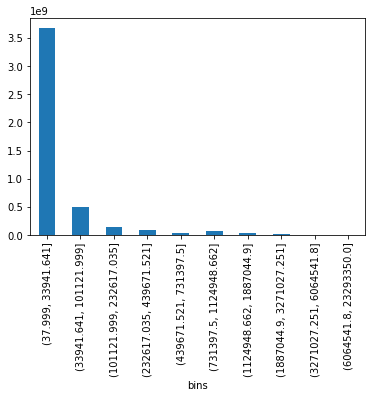

In [25]:
holding_time_gt_5['bins'] = pd.qcut(holding_time_gt_5['weighted_holding_time_sec'], q=10)
holding_time_gt_5.groupby('bins').total_liquidity.sum().plot.bar()

In [23]:
holding_time_gt_5['weighted_holding_time_sec'].mean() / 60 / 60 / 24

24.409178269325167